# Quick calculating tool for 1D lattice experiments

In [1]:
# coding: utf-8

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']= 100
import numpy as np
import matplotlib.colors as colors
from scipy.optimize import fsolve, curve_fit

hbar = 1.0545718*10**-34
c = 2.99792458*10**8
polarizability_0 = 1.64877727*10**(-41)
m = 163.929*1.66053906660*10**(-27)
epsilon_0 = 8.85418782*10**(-12)
k_B = 1.38064852*10**(-23)
a_0 = 5.29177210903*10**(-11)
mu_B = 9.274009994*10**(-24)

Gamma_741 = 2*np.pi*1.78*10**3   # in Hz
omega_741 = 2*np.pi*c/(741*10**(-9))
Gamma_421 = 2*np.pi*32.2*10**6
omega_421 = 2*np.pi*c/(421.172*10**(-9))
delta_421 = omega_421 - omega_741

E_recoil = hbar**2*(2*np.pi/(741*10**(-9)))**2/(2*m)

##### Clebsch Gordan Factor

omega_405 = 2*np.pi*c/(404.597*10**(-9))
omega_419 = 2*np.pi*c/(418.682*10**(-9))
Gamma_405 = 1.92*10**8
Gamma_419 = 1.26*10**8

(1/2)*((1+1/153)+(1/9)*(Gamma_419/Gamma_421)**2*(omega_421/omega_419)**6+(15/17)*(Gamma_405/Gamma_421)**2*(omega_421/omega_405)**6)

omega_419_bis = 2*np.pi*c/(419.484*10**(-9))
Gamma_419_bis = 8.8*10**7

kappa_blue = (1/2)*((1+1/153)+(1/9)*(Gamma_419/Gamma_421)**2*(omega_421/omega_419)**6+(1/9)*(Gamma_419_bis/Gamma_421)**2*(omega_421/omega_419_bis)**6+(15/17)*(Gamma_405/Gamma_421)**2*(omega_421/omega_405)**6)

omega_626 = 2*np.pi*c/(626*10**(-9))
Gamma_626 = 2*np.pi*135*10**3
(1/2)*((1/9)*(Gamma_626/Gamma_421)**2*(omega_421/omega_626)**6)

kappa_red = (1/2)*(1+1/153)

### Trap depth

The trap depth in single beam ODT is:
\begin{equation}
\label{eq:trap_depth}
U_{\text{ODT}} = \frac{1}{4}\text{Re}(\alpha)E^{2} = \frac{1}{2}\text{Re}(\alpha)\frac{I_{0}}{\epsilon_{0}c}
\end{equation}

For a Gaussian beam, noting $I_{0}$ the peak intensity, we have:
\begin{equation}
\label{gaussian_intensity}
I_{0} = \frac{2P}{\pi w_{0}^{2}}
\end{equation}

Where $w_{0}$ is the beam waist (radius). And in our case of a lattice, the trap depth comes from the 2 beams interfering, giving rise to a field amplitude of $2E$ at the antinodes, and thus 4 times the trapping depth compare to a regular ODT:
\begin{equation}
U = 2\text{Re}(\alpha)\frac{I_{0}}{\epsilon_{0}c} = 4\text{Re}(\alpha)\frac{P}{\pi w_{0}^{2}\epsilon_{0}c}
\end{equation}

### Trap frequency

The potential shape is $U\sin^{2}(kz)$, so near an antinode:
\begin{equation}
\label{trap_freq_depth}
Uk^{2}z^{2}=\frac12m\omega_{z}^{2}z^{2}
\end{equation}
which gives the trapping frequency in the lattice:
\begin{equation}
\label{trap_frequency}
\omega_{z}^{2} = 8\text{Re}(\alpha)\frac{Pk^{2}}{\pi w_{0}^{2}\epsilon_{0}cm}= \frac{32\pi\text{Re}(\alpha) P}{\lambda^{2} w_{0}^{2}\epsilon_{0}cm}
\end{equation}

It is useful to have the correspondance between trap frequency en lattice depth:
\begin{equation}
\frac{U}{E_{r}}=\frac{\frac{m\omega_{z}^{2}}{2k^{2}}}{\frac{\hbar^{2}k^{2}}{2m}} = \frac{m^{2}\omega_{z}^{2}}{\hbar^{2}k^{4}} = 0.05 (\omega_{z}(\text{kHz}))^{2}
\end{equation}

In [2]:
#omega_z = 2*np.pi*72*10**3 # Hertz
omega_z = 2*np.pi*5*10**3 # Hertz
U_in_recoil = m**2*(omega_z)**2/(hbar**2*(2*np.pi/(741*10**(-9)))**4)
print("A trap frequency of " + str(int(omega_z/(2*np.pi*10**3))) + 
      " kHz corresponds to " + str(int(U_in_recoil))+ " recoils")

A trap frequency of 5 kHz corresponds to 1 recoils


Equivalently, the recoil energy is 2.2 khz

In [5]:
E_r = hbar**2*(2*np.pi/(741*10**(-9)))**2/(2*m)
print("1 recoil is " + str(round(E_r/(hbar*2*np.pi*10**3),2)) + " kHz")

1 recoil is 2.22 kHz


And the correspondance between trap frequency and trap depth is:
\begin{equation}
\label{eq:trap_depth_vs_trap_freq}
U (\text{kHz}) = 0.11\omega_{z}^{2}(\text{kHz})
\end{equation}

In [25]:
Trap_depth_to_trap_freq = (1/2)*m*(2*np.pi*10**(3))**2/((2*np.pi/(741*10**(-9)))**2)/(hbar*2*np.pi*10**3)

print("A trap depth of " + str(round(Trap_depth_to_trap_freq, 2)) +
      " kHz corresponds to a trap frequency of " + str(int(1))+ " kHz")

A trap depth of 0.11 kHz corresponds to a trap frequency of 1 kHz


In [6]:
omega_z = 2*np.pi*5*10**3 # Hertz
Trap_depth = m*(omega_z)**2/(2*(2*np.pi/(741*10**(-9)))**2)
print("A trap frequency of " + str(int(omega_z/(2*np.pi*10**3))) + 
      " kHz corresponds to a trap depth of " + str(int(Trap_depth/(2*np.pi*hbar*10**3)))+ " kHz")

A trap frequency of 5 kHz corresponds to a trap depth of 0 kHz


### Polarizability

To evaluate the trap frequency we need the polarizability:
\begin{equation}
\text{Re}\left(\alpha(\omega)\right) = \frac{2}{\hbar}\sum_{k} d_{k}^{2}\frac{\omega_{kg}}{\omega_{kg}^{2}-\omega^{2}} = 6\pi\epsilon_{0}c^{3}\sum_{k}\frac{\Gamma_{k}}{\omega_{kg}^{3}}\frac{\omega_{kg}}{\omega_{kg}^{2}-\omega^{2}}
\end{equation}

Ben Lev's paper (arXiv:1011.4738) gives the background polarizability of dysprosium around 741: $\alpha_{741} = 220 \text{ a.u.}$. We add the single 741 line on top of that, and since $\omega \simeq \omega_{741}$:
\begin{equation}
\begin{array}{llll}
\text{Re}(\alpha) &=& \alpha_{741} - 3\pi\kappa_{r}\epsilon_{0}c^{3}\frac{\Gamma_{741}}{\omega_{741}^{3}}\frac{1}{\Delta_{741}} \\[10pt]
	&=& 220 - \frac{7437}{\Delta\text{ (GHz)}}\text{ a.u.}
\end{array}
\end{equation}

I introduced here $\kappa_{r} = \frac{1}{2}1^{2}+\frac{1}{2}\frac{1}{153} \simeq \frac{1}{2}$ to take into account the anisotropy due to the different Clebsch-Gordan coefficient in a linearly polarized lattice, with the electric field being orthogonal to the quantization axis. It is not clear if it should be factored out in front of the background polarizability also.
With $\Delta_{741} = \omega - \omega_{741}$ being negative for red-detuned light.

Converted into trap frequency through \ref{trap_frequency} it gives for the background polarizability trap frequency:
\begin{equation}
\omega_{z} = 2\pi\cdot 4.8\text{ MHz}\left( \frac{\sqrt{P(\text{Watt})}}{w_{0}(\mu\text{m})}\right)
\end{equation}

A $P = 0.5\text{ W}$ and $w_{0} = 10\mu\text{m}$ beam, without even thinking of the 741 line coming into play gives a bare trap frequency of 340 kHz. Considering the transition with the red light -100 GHz of detuning brings us to 395 kHz. The whole curve is plotted in figure \ref{trap_frequency_image}.

In [48]:
P = 0.096 # watts
w_0 = 61*10**(-6) # meters
#detuning = 33.8*2*np.pi*10**(9) # Hz
detuning = -3*2*np.pi*10**(9) # Hz
#P = 0.006

def trapFrequency(P, w_0, detuning): # P in watt, w_0 in m, Delta in Hz
    polarizability_prefactor = 3*np.pi*kappa_red*epsilon_0*c**3*Gamma_741/(omega_741**3)
    polarizability = 220*polarizability_0-polarizability_prefactor/detuning
    omega_z = np.sqrt(np.abs(32*np.pi*polarizability*P/((741*10**(-9))**2*w_0**2*epsilon_0*c*m)))
    return omega_z # beware, you should divide the result by 2pi to have the result in Hz

print("A P = " + str(P) + " watt and " + str(int(w_0*10**6)) + " micrometers beam waist beam gives a trap frequency of "
      + str(int(trapFrequency(P, w_0, detuning)/(2*np.pi*10**(3)))) + " kHz")

A P = 0.096 watt and 61 micrometers beam waist beam gives a trap frequency of 85 kHz


Or in terms of recoil you get

In [49]:
P = 0.096 # watts
w_0 = 61.7*10**(-6) # meters
detuning = -3*2*np.pi*10**(9) # Hz

def trapDepth(P, w_0, detuning): # P in watt, w_0 in m, Delta in Hz, output in recoil r
    omega_z = trapFrequency(P, w_0, detuning)
    return m**2*omega_z**2/(hbar**2*(omega_741/c)**4)

print("A P = " + str(P) + " watt and " + str(int(w_0*10**6)) + " micrometers beam waist beam gives a trap depth of "
      + str(int(trapDepth(P, w_0, detuning))) + " recoils")


print("A P = " + str(P) + " watt and " + str(int(w_0*10**6)) + " micrometers beam waist beam gives a trap depth of "
      + str(int(trapDepth(P, w_0, detuning)*hbar*(omega_741/c)**2/(2*m)/(2*np.pi*10**3))) + " kHz")

A P = 0.096 watt and 61 micrometers beam waist beam gives a trap depth of 366 recoils
A P = 0.096 watt and 61 micrometers beam waist beam gives a trap depth of 812 kHz


In [7]:
omega_z = 2*np.pi*650*10**3
oscillator_length = np.sqrt(hbar/(m/2*omega_z))
print(round(oscillator_length*10**9, 2))

13.77


In [8]:
detuning = -23*2*np.pi*10**(9) # Hz
P = 0.001
w_0 = 8*10**(-6) # meters
tau = 40*10**(-6)
omega_z = trapFrequency(P, w_0, detuning) # Hertz
Trap_depth = m*(omega_z)**2/(2*(2*np.pi/(741*10**(-9)))**2)
beta = Trap_depth*tau/hbar
print("beta = " + str(round(beta, 2)))

beta = 25.47


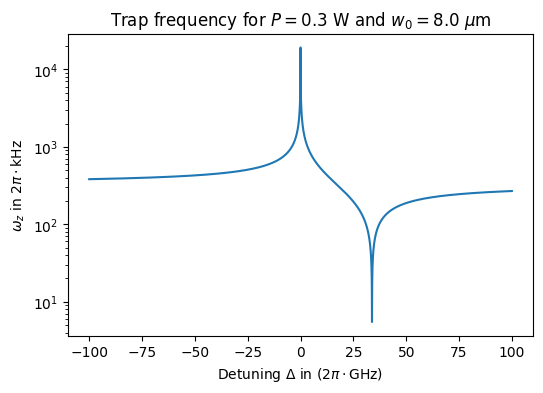

In [9]:
P = 0.3
w_0 = 8*10**(-6)
N = 10000
detuningRange = np.linspace(-100,100,N)*2*np.pi*10**9

plt.figure()
plt.semilogy(detuningRange/(2*np.pi*10**9), trapFrequency(P, w_0, detuningRange)/(2*np.pi*10**3), label = r'$\omega_{z}$')
plt.title(r'Trap frequency for $P = $'+ str(P) + ' W and $w_{0} = $' + str(10**6*w_0) + ' $\mu$m')
plt.ylabel(r'$\omega_{z}$ in $2\pi\cdot$kHz')
plt.xlabel(r'Detuning $\Delta$ in ($2\pi\cdot$GHz)')
plt.show()

### Spontaneous emission

The spontaneous emission is $\gamma = \Gamma\mathcal{P}_{e}$ with $\Gamma$ the linewidth and $\mathcal{P}_{e}$ the population in the excited state. 

We have $\mathcal{P}_{e}=\frac{1}{2}\frac{s}{1+s}\simeq \frac{\Omega^{2}}{4\Delta^{2}}$. $\Omega$ is the Rabi frequency that relates to $g$ the single photon Rabi frequency:
\begin{equation}
\Omega = g\sqrt{n+1}\simeq g\sqrt{n} = \frac{2}{\hbar}d\sqrt{\frac{\hbar\omega}{2\epsilon_{0}V}}\sqrt{n}
\end{equation}
And the photon number in a volume $V$ is simply $u/\hbar\omega = IV/c\hbar\omega$. So:
\begin{equation}
\Omega = \frac{2}{\hbar}d\sqrt{\frac{\hbar\omega}{2\epsilon_{0}V}}\sqrt{\frac{IV}{\hbar\omega c}}= \frac{d}{\hbar}\sqrt{\frac{2I}{\epsilon_{0}c}}
\end{equation}
And eventually:
\begin{equation}
\mathcal{P}_{e} = \frac{Id^{2}}{2\hbar^{2}\epsilon_{0}c\Delta^{2}}
\end{equation}

Here is the moment where one needs to be precise (and why I prefer the derivation with the Rabi frequency rather than using the saturation intensity). I think it is as if:
\begin{equation}
\Gamma_{0} = \frac{d^{2}\omega_{0}^{3}}{3\pi\hbar\epsilon_{0}c^{3}}
\end{equation}
So:
\begin{equation}
\gamma = \mathcal{P}_{e}\Gamma = \mathcal{P}_{e}\Gamma_{0}\left(\frac{\omega}{\omega_{0}}\right)^{3} = \frac{I}{2\hbar\Delta^{2}}\frac{3\pi c^{2}\Gamma_{0}^{2}}{\omega_{0}^{3}}\left(\frac{\omega}{\omega_{0}}\right)^{3}
\end{equation}
We then need to sum over all the possible excitation lines at the singlet ${}^{1}P$ states and the 741nm state.

### Clebsch-gordan coefficient consideration

The lattice will have a linear polarization, which decomposes as 50\%/50\% in $\sigma_{+}$ and $\sigma_{-}$ light to be able to both trap $+8$ and $-8$ states. We should therefore divide by 2 the effective $\Omega^{2}$ in the calculations, and similar for the spontaneous emission rate. Taking into account the different blue lines, the prefactor is eventually $\kappa_{b} = 0.85$ as if it was all coming from a 2-level system coming from the 421 line: $\gamma_{\text{blue}} \simeq 0.85\cdot\frac{I}{2\hbar\Delta_{421}^{2}}\frac{3\pi c^{2}\Gamma_{421}^{2}}{\omega_{421}^{3}}\left(\frac{\omega_{741}}{\omega_{421}}\right)^{3}$.

In [10]:
kappa_blue = (1/2)*((1+1/153)+(1/9)*(Gamma_419/Gamma_421)**2*(omega_421/omega_419)**6+(1/9)*(Gamma_419_bis/Gamma_421)**2*(omega_421/omega_419_bis)**6+(15/17)*(Gamma_405/Gamma_421)**2*(omega_421/omega_405)**6)
print(kappa_blue)

0.8465868638557852


We eventually get
\begin{equation}
\gamma_{\text{blue}} \simeq \frac{\kappa_{b} I}{2\hbar\Delta_{421}^{2}}\frac{3\pi c^{2}\Gamma_{421}^{2}}{\omega_{421}^{3}}\left(\frac{\omega_{741}}{\omega_{421}}\right)^{3}
\end{equation}
For the red transition, the overall coefficient is $\kappa_{r} = \frac{1}{2}1^{2}+\frac{1}{2}\frac{1}{153} \simeq \frac{1}{2}$, so:
\begin{equation}
\gamma_{\text{red}} \simeq \frac{\kappa_{r}I}{2\hbar\Delta_{741}^{2}}\frac{3\pi c^{2}\Gamma_{741}^{2}}{\omega_{741}^{3}}
\end{equation}
And:
\begin{equation}
\gamma = \gamma_{\text{blue}} + \gamma_{\text{red}} 
\end{equation}

Taking the intensity of a gaussian beam from \ref{gaussian_intensity} we can get the following formula:
\begin{equation}
\begin{array}{llll}
\gamma_{\text{blue}} &=& \frac{3 \kappa_{b} c^{2}\Gamma_{421}^{2}}{\hbar\Delta_{421}^{2}\omega_{421}^{3}}\left(\frac{\omega_{741}}{\omega_{421}}\right)^{3}\frac{P}{w_{0}^{2}} \\[10pt]
	&=& 4.9\cdot 10^{1} \left( \frac{P(\text{Watt})}{(w_{0}(\mu\text{m}))^{2}}\right) \text{ s}^{-1}
\end{array}
\end{equation}

In [11]:
P = 0.3 # watts
w_0 = 8*10**(-6) # meters

def gamma_blue(P, w_0):
    gamma_blue_prefactor = 3*kappa_blue*c**2*Gamma_421**2/(hbar*delta_421**2*omega_421**3)*(421/741)**3
    # prefactor = 1.13e-10 that becomes 113 once divided by (1um)**2
    return gamma_blue_prefactor*P/w_0**2

print("A P = " + str(P) + " watt and " + str(int(w_0*10**6)) + " micrometers beam waist beam gives a "
      + str(round(gamma_blue(P, w_0), 2)) + " s^-1 scattering rate from the blue lines, counted as a heating rate in a red lattice")

A P = 0.3 watt and 8 micrometers beam waist beam gives a 0.23 s^-1 scattering rate from the blue lines, counted as a heating rate in a red lattice


Similarly we have for the red state:
\begin{equation}
\begin{array}{llll}
\gamma_{\text{red}} &=& \simeq \frac{3\kappa_{r} c^{2}\Gamma_{741}^{2}}{\hbar\Delta_{741}^{2}\omega_{741}^{3}}\frac{P}{w_{0}^{2}} \\[10pt]
	&=& 2.5\cdot 10^{5} \left( \frac{P(\text{Watt})}{(w_{0}(\mu\text{m}))^{2}(\Delta(\text{GHz}))^{2}}\right) \text{ s}^{-1}
\end{array}
\end{equation}

In [12]:
P = 0.3 # watts
w_0 = 8*10**(-6) # meters
detuning = 2*np.pi*10*10**9 # Hz

def gamma_red(P, w_0, detuning):
    gamma_red_prefactor = 3*kappa_red*c**2*Gamma_741**2/(hbar*omega_741**3)
    gamma_red_prefactor_test = gamma_red_prefactor/((2*np.pi*10**9)**2*10**(-12)) # this one is equal to the formula in the text to be able to plug Delta in GHz directly and w_0 in um
    return gamma_red_prefactor/(detuning**2)*P/w_0**2

print("A P = " + str(P) + " watt and " + str(int(w_0*10**6)) + " micrometers beam waist beam gives a "
      + str(round(gamma_red(P, w_0, detuning), 2)) + " s^-1 scattering rate from the red light, counted as being in a red lattice")

A P = 0.3 watt and 8 micrometers beam waist beam gives a 11.63 s^-1 scattering rate from the red light, counted as being in a red lattice


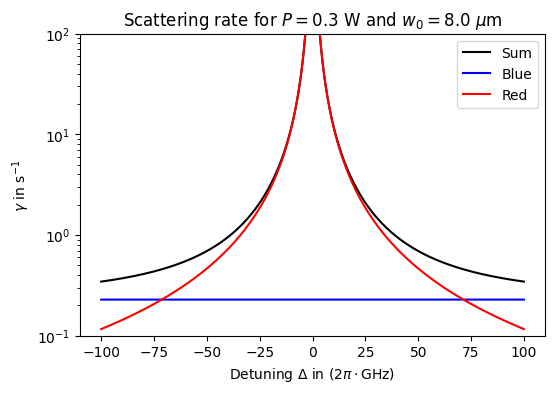

In [13]:
P = 0.3
w_0 = 8*10**(-6)
N = 10000
Detuning = np.linspace(-100,100,N)*2*np.pi*10**9
Gamma_blue = np.zeros(N) + gamma_blue(P, w_0)

plt.figure()
plt.semilogy(Detuning/(2*np.pi*10**9), Gamma_blue + gamma_red(P, w_0, Detuning), color = 'black', label = 'Sum')
plt.semilogy(Detuning/(2*np.pi*10**9), Gamma_blue, color = 'blue', label = 'Blue')
plt.semilogy(Detuning/(2*np.pi*10**9), gamma_red(P, w_0, Detuning), color = 'red', label = 'Red')
plt.ylim(10**-1,10**2)
plt.title(r'Scattering rate for $P = $'+ str(P) + ' W and $w_{0} = $' + str(10**6*w_0) + ' $\mu$m')
plt.ylabel(r'$\gamma$ in s$^{-1}$')
plt.xlabel(r'Detuning $\Delta$ in ($2\pi\cdot$GHz)')
plt.legend()
plt.show()

### Desired trap frequency

I refer here to the Ticknor paper. For our system, there are several scales. First the dipolar length:
\begin{equation}
\label{dipolar_length}
D =\mu_{m} \left(\frac{\mu_{0}}{4\pi}\right)\frac{d^{2}}{\hbar^{2}} = 10.5\text{ nm}
\end{equation}

In [14]:
D = m/2*1/(4*np.pi*epsilon_0*c**2)*(10*mu_B)**2/hbar**2
print("D = " + str(round(D*10**9,1)) + " nm")

D = 10.5 nm


With $\mu_{m} = m/2$ is the reduced mass, and $d = 10\mu_{B}$. The confinement length:
\begin{equation}
l = \sqrt{\frac{\hbar}{\mu\omega}} = \frac{352}{\sqrt{\omega(\text{kHz})}}\text{ nm}
\end{equation}

In [15]:
omega = 2*np.pi*10**6
l_osc = np.sqrt(hbar/((m/2)*omega))
print("A trap frequency omega = (2pi) " + str(int(omega/(2*np.pi*10**3))) + " kHz gives an oscillator length of "
      + str(round(l_osc*10**9, 1)) + " nm")

A trap frequency omega = (2pi) 1000 kHz gives an oscillator length of 11.1 nm


Note that here we used the reduced mass in the definition of the harmonic oscillator length, which is in agreement with what Ticknor uses.

The parameter $\bar{D} = D/l$ is then:
\begin{equation}
\bar{D} = \frac{D}{l} = 2.98\cdot 10^{-2}\sqrt{\omega(\text{kHz})}
\end{equation}

So a $\bar{D} = 0.34$ which is the threshold in the paper occurs for $\omega = 2\pi\cdot 128\text{ kHz}$ and a $\bar{D}$ of 1 for $\omega = 2\pi\cdot 1.11\text{ MHz}$

In [16]:
Dbar = 0.34
omegaThreshold = (Dbar/D)**2*hbar/(m/2)
print("Dbar = " + str(round(Dbar,2)) + " corresponds to omega = (2pi) " + str(int(omegaThreshold/(2*np.pi*10**3))) + " kHz")

Dbar = 0.34 corresponds to omega = (2pi) 128 kHz


The chemical potential of a Bose gas in a trap is:
\begin{equation}
\mu_{c} = \frac{\hbar\omega_{\text{ho}}}{2}\left(\frac{15Na}{a_{\text{ho}}}\right)^{2/5}
\end{equation}

In [17]:
#### Chemical potential
l_osc_trans = 2*10**(-6) # This is the radial oscillator length, on the order of a few micrometers.
omega_trans = hbar/(m*l_osc_trans**2) # so here I do NOT use the reduced mass, which maybe makes the whole thing a bit incoherent
omega_z = 2*np.pi*10**5
l_osc_z = np.sqrt(hbar/(m*omega_z))
N = 1000
a = 100*a_0

omega_av = (omega_z*omega_trans*omega_trans)**(1/3)
l_osc_av = (l_osc_z*l_osc_trans*l_osc_trans)**(1/3)
mu_c = hbar*omega_av/2*(15*N*a/l_osc_av)**(2/5)
print("The chemical potential is (2pi hbar) " + str(int(mu_c/(hbar*2*np.pi))) + " Hz")

The chemical potential is (2pi hbar) 1125 Hz


It gives $\mu_{c}/\hbar = 2\pi\cdot 1\text{ kHz}$ to 3 kHz for a trap depth varying from 100 kHz to 1 MHz trap with $10^{3}$ atoms and $100 a_{0}$ for the scattering length. Calculated in the blue lattice case (see later) with a transverse oscillator length of $2\mu$m. It has to be compared with the dipolar energy defined in the paper:
\begin{equation}
E_{D} = \frac{\hbar^{2}}{2\mu_{m}D^{2}} = \hbar (2\pi\cdot 556\text{ kHz})
\end{equation}

In [18]:
E_D = hbar**2/(m*D**2)
print("E_D = (2pi hbar) " + str(int(E_D/(2*np.pi*hbar*10**3))) + " kHz")

E_D = (2pi hbar) 556 kHz


Ticknor paper uses a WKB approximation to calculate the tunneling probability, and therefore the reduction we can expect in the losses. It uses the ratio of collisional energy to dipolar energy $y = log_{10}(E/E_{D})$. If the collisional energy is the chemical potential, we would probably always be in the strong 2D (and not the semiclassical limit) as depicted in figure 5 of the paper. The tunneling probability is depicted as follow in the formula 4 of the paper:
\begin{equation}
\begin{array}{cllll}
\ln(P_{T}) &=& a\bar{D}^{2/5} + b\bar{D}^{-1/10} \\
a &=& -5.17436 + 0.143167 y + 0.0093433 y^{2} \\
b &=& 5.16437 + 1.61799 y + 0.135513 y^{2}\\
\end{array}
\end{equation}

In [19]:
mu_c = 2*np.pi*hbar*1.0*10**3 # chemical potential
y = np.log10(mu_c/E_D)
a = -5.17436 + 0.143167*y + 0.0093433*y**2
b = 5.16437 + 1.61799*y + 0.135513*y**2
def ln_P_T(omega): #omega doesn't include the 2pi. mu_c = 2pi 2 kHz
    Dbar = D/np.sqrt(hbar/(m/2*omega))
    return a*(Dbar**(2/5))+b*(Dbar**(-1/10))

omega = 2*np.pi*1.0*10**6    # trap frequency
print("The reduction is " + str(round(np.exp(ln_P_T(omega)-ln_P_T(omegaThreshold)),2)) + " compare to threshold")

The reduction is 0.14 compare to threshold


### Comments on density

### Acceptable scattering rate

To know how big of a trapping frequency we can afford, one can plot the maximum trapping frequency available for a given scattering rate. This is done bellow for different beam waist. The zero is due to the background polarizability at 741.

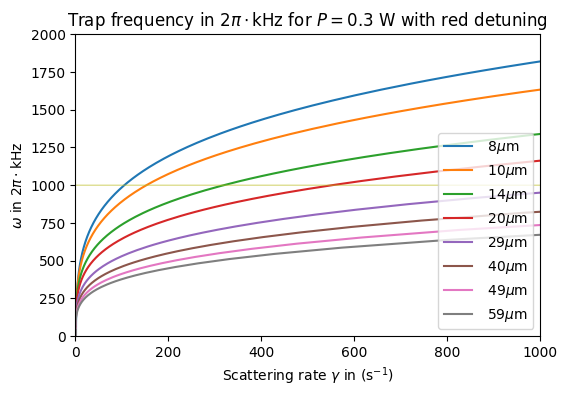

In [20]:
w_0_list = np.array([8, 10, 15, 20, 30, 40, 50, 60])*10**(-6)   # This is the list of the different beam waists we want to try
P = 0.3   # laser power
Detuning = np.linspace(300,0.01,10000)*2*np.pi*10**9    # + for blue detuning


plt.figure()
for w_0 in w_0_list:
    Omega = trapFrequency(P, w_0, Detuning)
    Gamma = gamma_blue(P, w_0) + gamma_red(P, w_0, Detuning)
    Omega_norm = Omega/(2*np.pi*10**3)
    plt.plot(Gamma, Omega_norm, label = r' '+ str(int(w_0*10**6)) + '$\mu$m' )
plt.plot(Gamma, Gamma*0 + 1000, lw = 0.5)
plt.xlim((0,1000))
plt.ylim((0,2000))
plt.title(r'Trap frequency in $2\pi\cdot$kHz for $P = $'+ str(P)+' W with red detuning')
plt.xlabel(r'Scattering rate $\gamma$ in (s$^{-1}$)')
plt.ylabel(r'$\omega$ in $2\pi\cdot$kHz')
plt.legend()
plt.show()

### Anti-trapping compensation

Unsing a red-detuned $10\mu$m 741 beam with $2\pi\cdot 1\text{ MHz}$ trap frequency would result in a transverse trap frequency of $\omega_{\perp} = 2\pi\cdot 17\text{ kHz}$. Putting $10^{3}$ atom per pancake would result in a density of a few $10^{18} \text{cm}^{-3}$ which would lead to strong 3-body losses. There we will use a blue detuned lattice, with extra confinement in the radial direction, and potentially also in the longitudinal direction with our ODT beams. 

On 0th order approximation, the anti-trapping force due to the blue lattice is zero as the atoms sit in the dark. However they explore a larger region of the trap due to the width of the ground state wavefunction, and by that they experience an outward force due to light gradient intensity.

In the case of a combined 741 and 1064 trap, the potential reads:
\begin{equation}
V(\rho, z) = V_{741}\sin^{2}(kz)e^{-\frac{\rho^{2}}{2w_{741}^{2}}}-V_{1064}e^{-\frac{\rho^{2}}{2w_{1064}^{2}}}
\end{equation}

It can be expended in a harmonic oscillator:
\begin{equation}
V(\rho, z) = \underbrace{V_{741}k^{2}z^{2}e^{-\frac{\rho^{2}}{2w_{741}^{2}}}}_{V_{1}(\rho, z)}-\underbrace{V_{1064}e^{-\frac{\rho^{2}}{2w_{1064}^{2}}}}_{V_{2}(\rho)}
\end{equation}

One can take a Bohr-Oppenheimer approach since the mouvement in the $z$ direction is much faster than in the $\rho$ one. We write the total wavefunction as $\Psi(\rho, z) = \phi(z;\rho)\psi(\rho)$ where $\phi(z;\rho)$ is a function of $z$ where $\rho$ is just a parameter. $H = T_{z} + T_{\rho, \theta} + V(\rho, z)$ where $T$ is the kinetic energy, and $(T_{z} + V_{1}(\rho,z))\phi(z;\rho) = E_{z}(\rho)\phi(z;\rho)$. If $\phi(z;\rho)$ is the $z$ ground state harmonic oscillator wavefunction:
\begin{equation}
\begin{array}{llll}
H\Psi(\rho, z) &=& (T_{z}+V_{1}(\rho,z))\phi(z;\rho)\psi(\rho) \\
& &+(T_{\rho, \theta} + V_{2}(\rho))\phi(z;\rho)\psi(\rho)\\
&=& (\frac{\hbar\omega_{z}(\rho)}{2}+T_{\rho, \theta} + V_{2}(\rho))\phi(z;\rho)\psi(\rho) \\
&=& \phi(z;\rho)(\frac{\hbar\omega_{z}(\rho)}{2}+T_{\rho, \theta} + V_{2}(\rho))\psi(\rho)
\end{array}
\end{equation}

Which is simply a 2D problem for $\psi(\rho)$ with the potential:
\begin{equation}
\begin{array}{lll}
\tilde{V}(\rho) &=& \frac{\hbar\omega_{z}(\rho)}{2} - V_{1064}e^{-\frac{\rho^{2}}{2w_{1064}^{2}}}\\
		     &=&  \hbar\sqrt{\frac{V_{741}}{2m}}ke^{-\frac{\rho^{2}}{w_{741}^{2}}} - V_{1064}e^{-\frac{\rho^{2}}{2w_{1064}^{2}}}\\
		     &\simeq& \tilde{V}_{0}+\frac{1}{2}m\underbrace{\left(-\frac{\hbar k\sqrt{2V_{741}}}{m^{3/2}w_{741}^{2}}+\frac{V_{1064}}{mw_{1064}^{2}}\right)}_{\omega_{\perp}^{2}}\rho^{2}
\end{array}
\end{equation}

Which is confining only if $\omega_{\perp}$ is real:
\begin{equation}
\begin{array}{rll}
\frac{V_{1064}}{mw_{1064}^{2}} &>& \frac{\hbar k\sqrt{2V_{741}}}{m^{3/2}w_{741}^{2}}\\[10pt]
\frac{\text{Re}(\alpha_{1064})P_{1064}}{\pi w_{1064}^{2}\epsilon_{0}c}\frac{1}{mw_{1064}^{2}} &>& \frac{\hbar k\sqrt{2}}{m^{3/2}w_{741}^{2}}\sqrt{\frac{m\omega_{z}^{2}}{2k^{2}}}\\[10pt]
\frac{P_{1064}}{w_{1064}^{4}} &>& \frac{\pi\epsilon_{0}c\hbar\omega_{z}}{\text{Re}(\alpha_{1064})w_{741}^{2}}
\end{array}
\end{equation}

Which for a $10\mu$m 741 beam waist and $2\pi\cdot 1\text{ MHz}$ trap frequency requires:
\begin{equation}
\frac{P_{1064}}{w_{1064}^{4}} > 2\cdot10^{-5}\text{ W}/(\mu\text{m})^{4}
\end{equation}



In [21]:
#### 1064 needed
w_0_741 = 61*10**(-6)  # 8 micron beam waist for the Ti:Sapph
w_0_1064 = 76*10**(-6)   # 12 micron 1064 beam

P_741 = 0.2
detuning = 0.04*2*np.pi*10**9
#omega_z_red = 0.15*2*np.pi*10**6 # to get 1 MHz trapping frequency
omega_z_red = trapFrequency(P_741, w_0_741, detuning)
P_1064_needed = w_0_1064**4*np.pi*epsilon_0*c*hbar*omega_z_red/(180*polarizability_0*w_0_741**2)
print("For a (2pi) " + str(round(omega_z_red/(2*np.pi*10**3))) + " kHz  trap frequency with " 
      + str(round(w_0_741*10**(6))) + " micrometers 741 beam waist, one needs a " 
      + str(round(P_1064_needed, 2)) + " W 1064 beam with a " + str(round(w_0_1064*10**(6))) 
      + " micrometers beam waist")

For a (2pi) 1028 kHz  trap frequency with 61 micrometers 741 beam waist, one needs a 17.16 W 1064 beam with a 76 micrometers beam waist


It corresponds to a power of $0.2$ W for a $10\mu$m 1064 beam waist, $1.2$ W for $16\mu$m and $3$ W for $20\mu$m beam waist. Given our 2-inch optics and the long wavelength of the ODT, it sounds more reasonable to target a $20\mu$m beam waist, or only slightly less.

I plot in figure \ref{fig:ideal_case} the effective potential for the most ideal case where $w_{1064} = w_{741}/\sqrt{2}$ and the ODT power being only slightly above $(1+10^{-4})$ the required frequency for perfectly cancelling the anti-trapping.


It is important that we want to keep the cloud centered inside the 741 lattice with a homogeneous $z$ trap frequency, the cloud shouldn't expand too much. In the Thomas-Fermi regime, the size of the cloud is determined by the chemical potential due to the interactions, typically on the order of a kHz. I plot in figure \ref{fig:cloud_size_power} the different trap size we obtain to get a sense of the sensitivity we have on the cloud size.




I plot figure \ref{fig:colorplots_local} the effective potential and the local trap frequency as well as contour plot of different chemical potentials. I take the center trap frequency to be set at 1MHz, and the chemical potential $\simeq 100\text{ Hz}, 1\text{ kHz}, 10\text{ kHz}$. The 741 beam waist being $10\mu$m and the 1064 being $15\mu$m.





We could set ourselves a constrain on the local trap frequency to not vary by more that $10\%$ on the edge than in the center of the trap. It goes as the square-root of the local 741 intensity so as $e^{-\rho^{2}/w_{741}^{2}}$ so we want $r_{c} > w_{741}\sqrt{|\ln(0.9)|}\simeq w_{741}/3$. We should therefore target for a cloud size of $\simeq 3\mu$m in the case of a $10\mu$m beam waist. A 3D density of $10^{-14} \text{ cm}^{-3}$ leads to a mean particle distance of $200\text{ nm}$, so with this density we could hope for $\simeq 300$ atoms per pancake.

If we use the current ODT, we are able to do the same thing, but the total number of atoms should be reduced by a factor of the aspect ratio. Indeed the 




Which gives rise to a force $\vec{F}=-\vec{\nabla}V$ that has a radial component:
\begin{equation}
F_{\rho}(z) = -\rho\underbrace{\left(\frac{V_{1064}}{w_{1064}^{2}}e^{-\frac{\rho^{2}}{2w_{1064}^{2}}}-\frac{V_{741}\sin^{2}(kz)}{w_{741}^{2}}e^{-\frac{\rho^{2}}{2w_{741}^{2}}}\right)}_{\text{local spring constant}}
\end{equation}

Averaged over the ground state wavefunction in the $z$ direction, the integral $\int\sin^{2}(kz)|\Psi(z)|^{2}\text{d}z = \frac12 e^{-a_{z}^{2}k^{2}}(e^{a_{z}^{2}k^{2}}-1)\simeq \frac{a_{z}^{2}k^{2}}{2}$. But I don't think it's the best thing to look at as we want the cloud to be stable everywhere.

If we assume that $w_{1064}>w_{741}$ it is enough to look at the spring constant in $\rho=0$ to ensure stability. Expanding the $\sin$ it gives:
\begin{equation}
F_{\rho}(z) = -\rho\left(\frac{V_{1064}}{w_{1064}^{2}}-\frac{V_{741}k^{2}z^{2}}{w_{741}^{2}}\right)
\end{equation}

The force is trapping as long as the spring constant is positive, so as long as $kz<\frac{w_{741}}{w_{1064}}\sqrt{\frac{V_{1064}}{V_{741}}}$. Giving a safe margin of $z<na_{z}$ (n=3 leads to above 99.99\% of the cloud being trapped) we want:

\begin{equation}
V_{1064}>n^{2}k^{2}a_{z}^{2}V_{741}\frac{w_{1064}}{w_{741}}
\end{equation}

The trap depth for the lattice is as we saw $V_{741} = \frac{m\omega_{z}^{2}}{2k^{2}}$. It simplifies in:

\begin{equation}
\label{eq:constraint_depth}
V_{1064}>n^{2}\frac{\hbar\omega_{z}}{2}\frac{w_{1064}}{w_{741}}
\end{equation}

Taking $n=3$, $w_{1064}=20\mu$m and $w_{741}=10\mu$m, for a $2\pi\cdot1\text{ MHz}$ trap frequency it gives $V_{1064}>\hbar2\pi\cdot 9\text{ MHz}$ and corresponds to a power of $P=6.7$ W.

Such a power and beam waist would correspond from equation \ref{eq:transverse_trap_freq} to a radial trap frequency of $\omega_{\perp}=2\pi\cdot 2.4\text{ kHz}$, which is quite comparable to the chemical potential, so small Thomas-Fermi regime. The oscillator length associated is $a_{\perp}=160\text{ nm}$, and the Thomas-Fermi radius with a 3 kHz chemical potential is: $r_{c} = 260\text{ nm}$.
Taking $n=2$ leads to $V_{1064}/\hbar = 2\pi\cdot 4\text{ MHz}$, $P = 3$ W, $\omega_{\perp} = 2\pi\cdot 1.6$ kHz, $a_{\perp}=200\text{ nm}$ and $r_{c} = 390\text{ nm}$. In this latter case the density would be with $N=10^{3}$ atoms per pancake on the order of $n_{0} \simeq 10^{17} \text{ cm}^{-3}$.

If we want an equivalent of $10^{15} \text{ cm}^{-3}$ density, it means that the mean distance is $100\text{ nm}$, so that we can fit $4*(300/100)^{2} \simeq 30-40$ atoms per pancake.

If we want to go the other way around and fix $r_{c} = 2\mu\text{m}$ with $\mu_{c}/\hbar = 2\pi\cdot 3\text{ kHz}$ it implies a $\omega_{\perp} = 2\pi\cdot 300\text{ Hz}$. With combining equations \ref{trap_depth}, \ref{gaussian_intensity} and \ref{eq:transverse_trap_freq} we have $\omega_{\perp} = \frac{2}{w_{0}^{2}}\sqrt{\frac{\text{Re}(\alpha)P}{\pi m\epsilon_{0}c}}$ and therefore $\sqrt{P}/w_{0}^{2}$ is constrained. The equation \ref{eq:constraint_depth} give a subsequent constraint that leads to $w_{1064} = \frac{\pi\epsilon_{0}cn^{2}\hbar\omega_{z}}{2w_{741} \text{Re}(\alpha) (\sqrt{P}/w_{1064}^{2})^{2}}=533\mu m$ and $P = 56$ kW.

This being ridiculous it would be better to consider the maximum power we can put (twice 15 W) in the horizontal arms which would bring to something quite close to the 6.7 W beam from the top.

If we want to reduce further down the top 1064 beam power requirement I would split it into two and use one of the current crossed ODT beam. With the current $40\mu$m beam waist in each arm, it gives two trap frequencies of $\omega_{\perp, 1} = 2\pi\cdot 1.2\text{ kHz}$ and $\omega_{\perp, 2} = 2\pi\cdot 26\text{ Hz}$.

STILL NOT GOOD. EXPLORE WITH LESS POWER, WITH THE CLOUD STILL BEING CONFINED ON THE EDGES, PLAYING WITH THE EXPONENTIAL FACTOR IN THE TRAPPING POTENTIAL

FEW FACTORS OF 2 TO FIGURE OUT:

- The one in the excited state population when looking at rabi formula or OBE.

- The mass that is used, sometimes $m$ and sometimes $\mu_{m}$ are used incoherently.

------------------------------------------------------------------------------------------------------------------

## Useful calculation

If you want to know what is the lattice depth is terms of recoil, as a function of power, beam waist and detuning :

In [22]:
P = 0.3 # watts
w_0 = 50*10**(-6) # meters
detuning = 10*2*np.pi*10**(9) # Hz

def trapFrequency(P, w_0, detuning): # P in watt, w_0 in m, Delta in Hz
    polarizability_prefactor = 3*np.pi*kappa_red*epsilon_0*c**3*Gamma_741/(omega_741**3)
    polarizability = 220*polarizability_0-polarizability_prefactor/detuning
    omega_z = np.sqrt(np.abs(32*np.pi*polarizability*P/((741*10**(-9))**2*w_0**2*epsilon_0*c*m)))
    return omega_z # beware, you should divide the result by 2pi to have the result in Hz

print("A P = " + str(P) + " watt and " + str(int(w_0*10**6)) + " micrometers beam waist beam gives a trap frequency of "
      + str(int(trapFrequency(P, w_0, detuning)/(2*np.pi*10**(3)))) + " kHz")

A P = 0.3 watt and 49 micrometers beam waist beam gives a trap frequency of 81 kHz


------------------------------------------------------------------------------------------------------------------